# Introduction to Pycaret

## Collecting data

In [40]:
from pycaret.datasets import get_data

data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [41]:
data.shape

(24000, 24)

In [42]:
test = data.sample(frac=0.1)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [43]:
print(test.shape)
print(train.shape)

(2400, 24)
(21600, 24)


In [6]:
test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,50000,2,2,1,41,0,0,0,0,0,...,12214.0,12458.0,12719.0,1172.0,1192.0,1202.0,446.0,462.0,464.0,0
1,50000,1,2,1,49,0,0,0,0,0,...,49735.0,14240.0,890.0,2313.0,2313.0,2082.0,677.0,890.0,14441.0,1
2,500000,2,1,2,36,1,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,50000,1,2,2,28,0,0,0,0,0,...,27806.0,24901.0,25441.0,2500.0,2500.0,2000.0,2000.0,941.0,3113.0,1
4,240000,2,1,1,40,2,2,2,2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0


## Setting up the Pycaret Environment

In [38]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

In [12]:
clf = setup(data=train, target="default")

Setup Succesfully Completed!


,Description,Value
0,session_id,8114
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(21600, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
model = compare_models(sort="Accuracy")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8239,0.0000,0.3654,0.6942,0.4784,0.3845,0.4134,0.0384
1,Linear Discriminant Analysis,0.8235,0.7666,0.3783,0.6827,0.4864,0.3903,0.4153,0.1494
2,Gradient Boosting Classifier,0.8216,0.7804,0.3633,0.6826,0.4737,0.3782,0.4058,4.9583
3,CatBoost Classifier,0.8208,0.7802,0.3747,0.6708,0.4802,0.3823,0.4063,6.0445
4,Light Gradient Boosting Machine,0.8206,0.7786,0.3732,0.6704,0.4789,0.3811,0.4053,0.3210
5,Ada Boost Classifier,0.8190,0.7730,0.3388,0.6843,0.4523,0.3585,0.3908,1.1153
6,Extreme Gradient Boosting,0.8148,0.7588,0.3621,0.6455,0.4636,0.3623,0.3846,3.4654
7,Random Forest Classifier,0.8061,0.7270,0.3209,0.6196,0.4221,0.3196,0.3449,0.1098
8,Extra Trees Classifier,0.8054,0.7373,0.3744,0.5966,0.4599,0.3487,0.3629,0.3378
9,Logistic Regression,0.7788,0.6536,0.0024,0.3833,0.0047,0.0027,0.0193,0.1891


In [14]:
print(model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8114,
                solver='auto', tol=0.001)


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [16]:
ridgeclf = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8221,0.0000,0.3952,0.6633,0.4953,0.3956,0.4152
1,0.8221,0.0000,0.3593,0.6857,0.4715,0.3769,0.4054
2,0.8241,0.0000,0.3683,0.6910,0.4805,0.3862,0.4139
3,0.8287,0.0000,0.3743,0.7143,0.4912,0.4000,0.4303
4,0.8148,0.0000,0.3144,0.6731,0.4286,0.3350,0.3697
5,0.8161,0.0000,0.3672,0.6508,0.4695,0.3685,0.3906
6,0.8221,0.0000,0.3672,0.6833,0.4777,0.3819,0.4087
7,0.8360,0.0000,0.3731,0.7669,0.5020,0.4175,0.4564
8,0.8241,0.0000,0.3552,0.7041,0.4722,0.3801,0.4122
9,0.8286,0.0000,0.3802,0.7095,0.4951,0.4030,0.4315


In [17]:
print(ridgeclf)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=8114,
                solver='auto', tol=0.001)


## Hyperparameter tuning

In [18]:
tuned_ridge = tune_model(ridgeclf, optimize="Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8214,0.0000,0.3922,0.6616,0.4925,0.3926,0.4124
1,0.8221,0.0000,0.3623,0.6836,0.4736,0.3785,0.4061
2,0.8241,0.0000,0.3683,0.6910,0.4805,0.3862,0.4139
3,0.8280,0.0000,0.3743,0.7102,0.4902,0.3985,0.4281
4,0.8155,0.0000,0.3144,0.6774,0.4294,0.3365,0.3719
5,0.8168,0.0000,0.3701,0.6526,0.4724,0.3716,0.3935
6,0.8228,0.0000,0.3672,0.6872,0.4786,0.3835,0.4108
7,0.8353,0.0000,0.3731,0.7622,0.5010,0.4159,0.4541
8,0.8241,0.0000,0.3552,0.7041,0.4722,0.3801,0.4122
9,0.8286,0.0000,0.3802,0.7095,0.4951,0.4030,0.4315


In [19]:
print(tuned_ridge)

RidgeClassifier(alpha=0.007, class_weight=None, copy_X=True,
                fit_intercept=False, max_iter=None, normalize=False,
                random_state=8114, solver='auto', tol=0.001)


## Plotting model

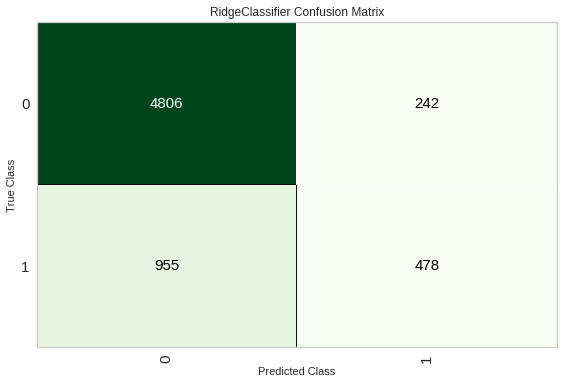

In [21]:
plot_model(tuned_ridge, plot="confusion_matrix")

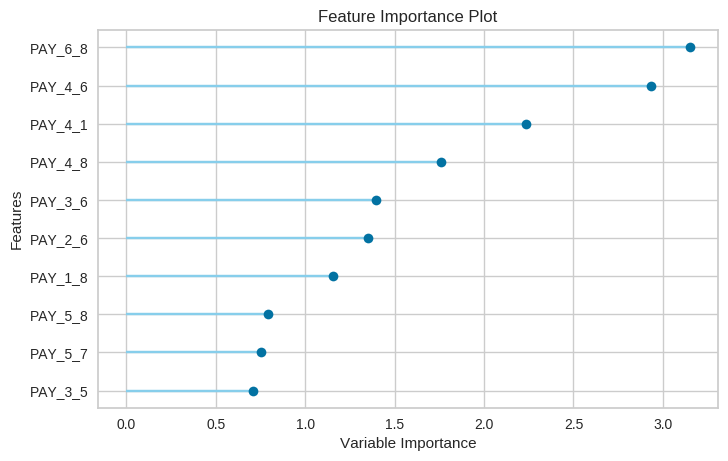

In [22]:
plot_model(tuned_ridge, plot="feature")

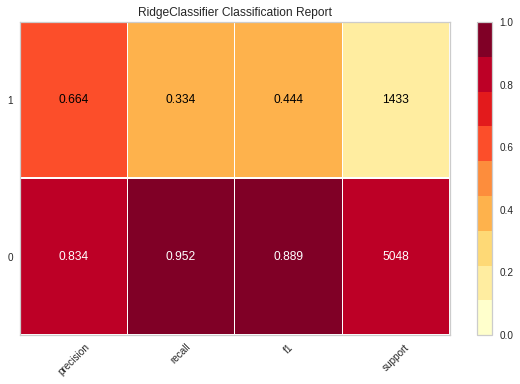

In [26]:
plot_model(tuned_ridge, plot="class_report")

In [27]:
evaluate_model(ridgeclf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalize

In [28]:
predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8153,0,0.3336,0.6639,0.444,0.3475,0.3772


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label
0,20000.0,24.0,1360.0,1301.0,2257.0,2641.0,5041.0,248.0,1301.0,1267.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,200000.0,32.0,148959.0,152810.0,159907.0,168200.0,148987.0,152224.0,6700.0,10000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,160000.0,58.0,1443.0,1443.0,1443.0,1443.0,1443.0,1443.0,1443.0,1443.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,180000.0,44.0,172064.0,175287.0,119687.0,131725.0,134122.0,133961.0,8000.0,5018.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,10000.0,46.0,6772.0,7790.0,8799.0,8974.0,9162.0,9375.0,1128.0,1137.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476,470000.0,34.0,247503.0,245552.0,238161.0,240607.0,230142.0,198171.0,9024.0,10400.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6477,350000.0,33.0,293303.0,338272.0,177483.0,182381.0,194678.0,215024.0,50070.0,10000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6478,110000.0,33.0,12633.0,88334.0,53978.0,23687.0,26567.0,8435.0,80004.0,1500.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6479,260000.0,37.0,131472.0,134283.0,130398.0,134075.0,130448.0,134477.0,5036.0,5000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [29]:
final_ridge = finalize_model(tuned_ridge)

In [30]:
from pycaret.utils import check_metric

## Saving models

In [34]:
save_model(final_ridge, "ridge_model")

Transformation Pipeline and Model Succesfully Saved


In [35]:
saved_model = load_model("ridge_model")

Transformation Pipeline and Model Successfully Loaded


In [36]:
type(saved_model)

sklearn.pipeline.Pipeline

In [44]:
predictions = predict_model(saved_model, test)

In [45]:
predictions

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label
0,230000,2,1,1,45,-2,-2,-2,-2,-2,...,0.0,136.0,0.0,0.0,0.0,0.0,136.0,1233.0,0,0
1,50000,1,3,2,41,0,0,0,0,0,...,10945.0,11214.0,1500.0,1500.0,600.0,500.0,600.0,500.0,0,0
2,140000,1,2,2,62,0,0,0,0,0,...,117059.0,117405.0,4839.0,5000.0,5000.0,7500.0,7000.0,5029.0,0,0
3,340000,1,2,2,41,-2,-2,-2,-2,-2,...,6209.0,2081.0,3842.0,0.0,4036.0,6254.0,2091.0,1917.0,0,0
4,210000,2,1,1,52,-1,-1,-1,-2,-1,...,1858.0,45.0,738.0,0.0,0.0,1858.0,45.0,3667.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,30000,2,1,1,27,1,-1,-1,-1,0,...,3107.0,0.0,306.0,2017.0,6316.0,62.0,0.0,1002.0,0,0
2396,260000,2,2,2,31,-1,3,2,2,2,...,92447.0,95925.0,0.0,0.0,17000.0,0.0,5015.0,4293.0,0,0
2397,140000,1,1,2,44,-1,-1,-1,-1,-1,...,5280.0,5930.0,5717.0,7146.0,5930.0,5280.0,5930.0,0.0,0,0
2398,20000,1,2,1,32,0,0,0,0,0,...,19600.0,20000.0,1458.0,1600.0,384.0,392.0,400.0,0.0,1,0


In [50]:
check_metric(predictions.default, predictions.Label.astype(int), metric="Accuracy")

0.8175